In [1]:
import numpy as np
from numpy.linalg import norm
from random import normalvariate
from math import sqrt
from scipy.io import loadmat
import matplotlib.pylab as plt
import pandas as pd

In [2]:
def randomUnitVector(n):
    unnormalized = [normalvariate(0, 1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]

In [3]:
def svd_1d(X, epsilon=1e-10):
    A = np.array(X)
    
    n, m = A.shape
    
    Dr = np.diag(A.sum(axis=1))
    Dc = np.diag(A.sum(axis=0))
    
    Dc_1 = np.linalg.inv(Dc)
    Dr_1 = np.linalg.inv(Dr)
    
    col1 = np.concatenate([np.zeros((n,n)), np.dot(Dc_1 , A.T)])
    col2 = np.concatenate([np.dot(Dr_1 , A), np.zeros((m,m))])
    
    S = np.concatenate([col1, col2], axis=1)
    
    x = randomUnitVector(n+m)
    lastV = None
    currentV = x
    
    lastE = np.linalg.norm(currentV)

    iterations = 0
    while True:
        iterations += 1
        lastV = np.array(currentV)
        currentV = np.dot(S, lastV)
        currentV = currentV / norm(currentV)
        
        last_u = lastV[list(range(0,n))]
        last_v = lastV[list(range(n,n+m))]
        
        current_u = currentV[list(range(0,n))]
        current_v = currentV[list(range(n,n+m))]
        
        e_u = np.linalg.norm(current_u - last_u)
        e_v = np.linalg.norm(current_v - last_v)
        
        currentE = e_u + e_v
        
        d = abs(currentE - lastE)
        lastE = currentE
        
        if d <= epsilon:
            print("converged in {} iterations!".format(iterations))

            u = currentV[range(0,n)]
            v = currentV[range(n,n+m)]
            
            return u, v

# Données Townships :

In [5]:
X = np.array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

columns=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"]
index=["HighSchool", "AgricultCoop", "Railstation", "OneRoomSchool", "Veterinary", "NoDoctor", "NoWaterSupply",  "PoliceStation", "LandReallocation"]

pd.DataFrame(X, columns=columns, index = index)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
HighSchool,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
AgricultCoop,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0
Railstation,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
OneRoomSchool,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1
Veterinary,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0
NoDoctor,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1
NoWaterSupply,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
PoliceStation,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
LandReallocation,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0


In [18]:
u, v = svd_1d(X, 1e-10)

sort_u = u.argsort()
sort_v = v.argsort()

reordered_X = X[:, sort_v]
reordered_X = reordered_X[sort_u, :]

columns=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"]
columns = np.array(columns)
columns = columns[sort_v]

index=["HighSchool", "AgricultCoop", "Railstation", "OneRoomSchool", "Veterinary", "NoDoctor", "NoWaterSupply",  "PoliceStation", "LandReallocation"]
index = np.array(index)
index = index[sort_u]

pd.DataFrame(reordered_X, index = index, columns = columns)

converged in 25 iterations!


,H,K,B,C,D,G,L,O,A,E,F,P,I,J,M,N
HighSchool,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Railstation,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PoliceStation,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AgricultCoop,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Veterinary,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
LandReallocation,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
OneRoomSchool,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
NoDoctor,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
NoWaterSupply,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1


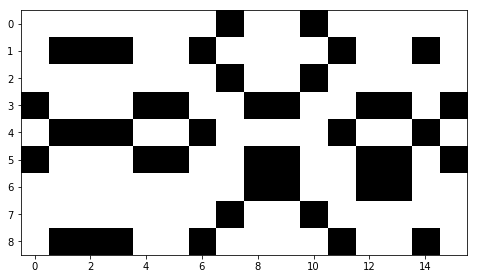

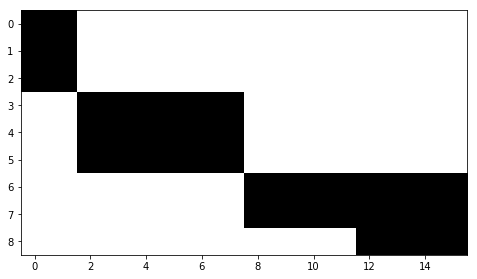

In [19]:
plt.figure(figsize = (8,4.5))
plt.imshow(X, cmap='binary', aspect='auto')
plt.show()

plt.figure(figsize = (8,4.5))
plt.imshow(reordered_X, cmap='binary', aspect='auto')
plt.show()

# Données Classic3